# MNIST 손글씨 - CNN v3
- 2 x Conv2D layers
- MaxPooling 2D layer
- Dropout(0.25) layer
- 1 FCN layer
- 1 Output layer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# X_train, X_test 정규화(0 ~ 1), 이미지 차원 변경: 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의 / 설정 / 학습 / 평가

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),               # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [ ]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [ ]:
model_path = 'best-mnist-cnn-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [ ]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
237/240 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9314
Epoch 1: val_loss improved from inf to 0.05655, saving model to best-mnist-cnn-v2.h5
240/240 [==============================] - 15s 17ms/step - loss: 0.2204 - accuracy: 0.9319 - val_loss: 0.0566 - val_accuracy: 0.9833
Epoch 2/100
237/240 [============================>.] - ETA: 0s - loss: 0.0625 - accuracy: 0.9809
Epoch 2: val_loss improved from 0.05655 to 0.05152, saving model to best-mnist-cnn-v2.h5
240/240 [==============================] - 4s 15ms/step - loss: 0.0623 - accuracy: 0.9810 - val_loss: 0.0515 - val_accuracy: 0.9848
Epoch 3/100
236/240 [============================>.] - ETA: 0s - loss: 0.0434 - accuracy: 0.9866
Epoch 3: val_loss improved from 0.05152 to 0.03926, saving model to best-mnist-cnn-v2.h5
240/240 [==============================] - 3s 14ms/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0393 - val_accuracy: 0.9884
Epoch 4/100
236/240 [============================

In [ ]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9913


[0.0295428317040205, 0.9912999868392944]

- 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

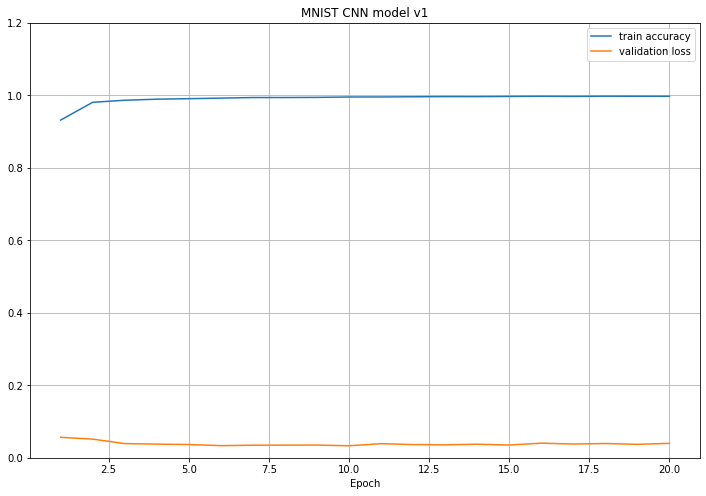

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('MNIST CNN model v1')
plt.show()